In [5]:
from os import getcwd
from sys import path
path.append(getcwd())
from utility_functions import run_circuits, IBMQ_backends

/var/folders/83/tp59cvq56913vqwf5cmndwvm0000gn/T/ipykernel_31384/4133295480.py:4: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from utility_functions import run_circuits, IBMQ_backends


In [2]:
run_circuits(1, 4, IBMQ_backends.ibm_lagos, False)

Using ibm_lagos
n = 1
[0.0]
Using ibm_lagos
n = 2
[0.0, 0.5]
Using ibm_lagos
n = 3
[0.0, 0.5, 0.6666666666666666]


In [3]:
import pkg_resources

installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
for package in installed_packages_list:
    print(package)


asttokens==2.4.1
backoff==2.2.1
backports.functools-lru-cache==1.6.5
certifi==2023.7.22
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.1.4
contourpy==1.2.0
cryptography==41.0.5
cycler==0.12.1
debugpy==1.6.7
decorator==5.1.1
dill==0.3.7
exceptiongroup==1.1.3
executing==2.0.1
fonttools==4.44.3
ibm-cloud-sdk-core==3.18.0
ibm-platform-services==0.47.0
idna==3.4
importlib-metadata==6.8.0
ipykernel==6.26.0
ipynb==0.5.1
ipython==8.17.2
ipywidgets==8.1.1
jedi==0.19.1
jupyter-client==8.6.0
jupyter-core==5.5.0
jupyterlab-widgets==3.0.9
kiwisolver==1.4.5
matplotlib-inline==0.1.6
matplotlib==3.8.1
mpmath==1.3.0
nest-asyncio==1.5.8
ntlm-auth==1.5.0
numpy==1.23.5
packaging==23.2
pandas==2.1.3
parso==0.8.3
pbr==6.0.0
pickleshare==0.7.5
pillow==10.1.0
pip==23.3
platformdirs==4.0.0
ply==3.11
prompt-toolkit==3.0.41
psutil==5.9.0
pure-eval==0.2.2
pycparser==2.21
pydot==1.4.2
pygments==2.16.1
pyjwt==2.8.0
pylatexenc==2.10
pyparsing==3.1.1
python-dateutil==2.8.2
pytz==2023.3.post1
pywin32==

In [4]:
run_circuits(1, 11, IBMQ_backends.ibm_lagos, False)

Using ibm_lagos
n = 1
[1.0]
Using ibm_lagos
n = 2
[1.0, 1.0]
Using ibm_lagos
n = 3
[1.0, 1.0, 0.6666666666666666]
Using ibm_lagos
n = 4
[1.0, 1.0, 0.6666666666666666, 0.75]
Using ibm_lagos
n = 5
[1.0, 1.0, 0.6666666666666666, 0.75, 0.4]
Using ibm_lagos
n = 6
[1.0, 1.0, 0.6666666666666666, 0.75, 0.4, 0.6666666666666666]
Using ibm_lagos
n = 7
[1.0, 1.0, 0.6666666666666666, 0.75, 0.4, 0.6666666666666666, 0.7142857142857143]
Using ibm_lagos
n = 8
[1.0, 1.0, 0.6666666666666666, 0.75, 0.4, 0.6666666666666666, 0.7142857142857143, 0.5]
Using ibm_lagos
n = 9
[1.0, 1.0, 0.6666666666666666, 0.75, 0.4, 0.6666666666666666, 0.7142857142857143, 0.5, 0.6666666666666666]
Using ibm_lagos
n = 10
[1.0, 1.0, 0.6666666666666666, 0.75, 0.4, 0.6666666666666666, 0.7142857142857143, 0.5, 0.6666666666666666, 0.5]


In [5]:
from qiskit.providers.ibmq import least_busy

In [63]:
from qiskit import QuantumCircuit, transpile, IBMQ, providers
from qiskit.providers import ibmq

def plot_results(results_list):
    from matplotlib import pyplot
    # 繪製標準化後的數據，並添加標記以顯示每個點
    pyplot.plot(results_list, marker='.')
    # 繪製 y = 0.5 的線
    pyplot.axhline(y=0.5, color='r')
    pyplot.ylim(0, 1)
    # 顯示圖表
    pyplot.show()

class IBMQ_backends:
    IBMQ.load_account()
    provider = IBMQ.get_provider()

    @classmethod
    def ibm_lagos(cls):
        return cls.provider.backends.ibm_lagos

    @classmethod
    def least_busy(cls):
        return ibmq.least_busy(cls.provider.backends(simulator = False))
    
    @classmethod
    def simulator(cls):
        return ibmq.least_busy(cls.provider.backends(simulator = True))


ibmqfactory.load_account:WARNING:2023-12-15 02:15:37,461: Credentials are already in use. The existing account in the session will be replaced.


In [64]:
def plot_results(results_list):
    from matplotlib import pyplot
    # 繪製標準化後的數據，並添加標記以顯示每個點
    pyplot.plot(results_list)
    # 繪製 y = 0.5 的線
    pyplot.axhline(y=0.5, color='r')
    pyplot.ylim(0, 1)
    # 顯示圖表
    pyplot.show()

In [59]:

def run_circuits(start, stop, get_backend):
    qc = QuantumCircuit(1, 1)
    qc.h(0)  # 添加 H-gate
    qc.measure([0], [0])

    n = int(stop)
    
    result_list = []
    
    backend = get_backend()
    print(f"Using {backend.name()}")
   
    result = backend.run(transpile(qc,  backend=backend ,optimization_level=3),  shots=n, memory=True).result()
    
    # 獲得每次測量的結果
    measurement_results = result.get_memory()
    print('measurement results =' ,measurement_results)
    for i in range(start-1, stop):
        ith_list = measurement_results[start-1 : i+1]
        ith_0_num = ith_list.count('0')
        ith_0_prob = ith_0_num/(i+1)

        #print(ith_list,ith_0_num,ith_0_prob )
        result_list.append(ith_0_prob)
    print('probability of 0 =',result_list)
    plot_results(result_list)


Using ibmq_qasm_simulator
measurement results = ['0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '

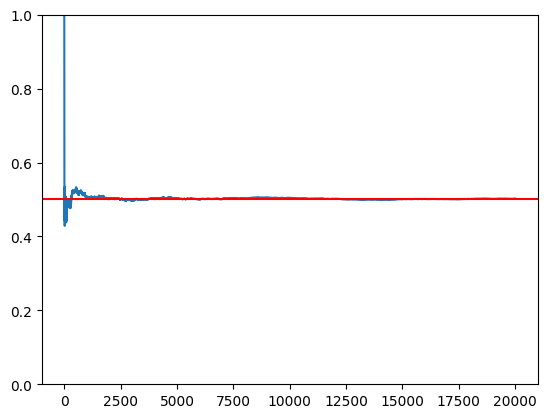

In [67]:
run_circuits(1, 20000,IBMQ_backends.simulator)
#單次shots最大為20000

Using ibm_osaka
measurement results = ['1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '

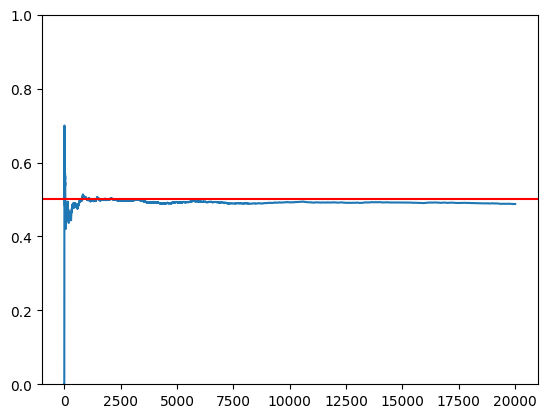

In [68]:
run_circuits(1, 20000,IBMQ_backends.least_busy)

Using ibm_kyoto
measurement results = ['1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '

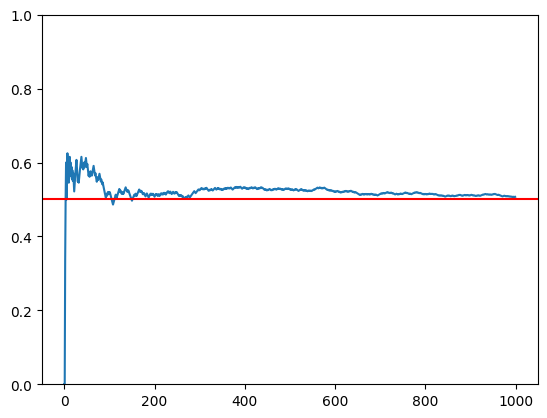

In [70]:
run_circuits(1, 1000,IBMQ_backends.least_busy)

Using ibmq_qasm_simulator
measurement results = ['1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '

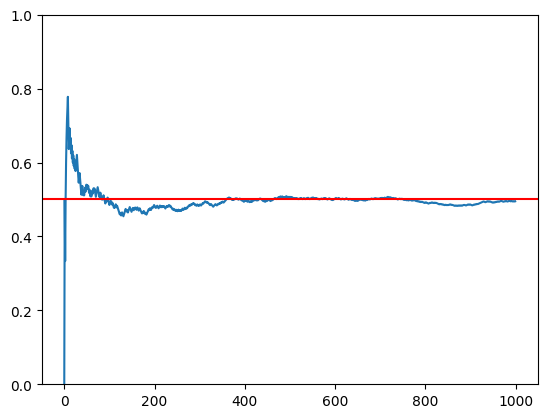

In [71]:
run_circuits(1, 1000,IBMQ_backends.simulator)

In [15]:
from qiskit import QuantumCircuit, execute, Aer


# 創建一個簡單的量子電路
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# 使用Qiskit的模擬器執行電路
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=10,memory=True).result()

# 獲得每次測量的結果
measurement_results = result.get_memory()
print(measurement_results)

['0', '0', '1', '1', '0', '1', '0', '0', '1', '1']
